In [1]:
from google.colab import files
uploaded = files.upload()

Saving covid-dataset.csv to covid-dataset.csv


In [2]:
import numpy as np
import pandas as pd
import random

df=pd.read_csv("covid-dataset.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [3]:
print ("Number of rows: ", df.shape[0])
print ("Number of column: ", df.shape[1])
print ("")
display(df.columns.to_frame().T)

Number of rows:  350085
Number of column:  67



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million


In [4]:
columns_with_missing_values = df.columns[df.isnull().any()]

for column in columns_with_missing_values:
    missing_count = df[column].isnull().sum()
    print(f"Missing values in {column}: {missing_count}")

Missing values in continent: 16665
Missing values in total_cases: 37997
Missing values in new_cases: 9628
Missing values in new_cases_smoothed: 10887
Missing values in total_deaths: 59584
Missing values in new_deaths: 9574
Missing values in new_deaths_smoothed: 10804
Missing values in total_cases_per_million: 37997
Missing values in new_cases_per_million: 9628
Missing values in new_cases_smoothed_per_million: 10887
Missing values in total_deaths_per_million: 59584
Missing values in new_deaths_per_million: 9574
Missing values in new_deaths_smoothed_per_million: 10804
Missing values in reproduction_rate: 165268
Missing values in icu_patients: 312470
Missing values in icu_patients_per_million: 312470
Missing values in hosp_patients: 311183
Missing values in hosp_patients_per_million: 311183
Missing values in weekly_icu_admissions: 339880
Missing values in weekly_icu_admissions_per_million: 339880
Missing values in weekly_hosp_admissions: 326832
Missing values in weekly_hosp_admissions_per

In [5]:
rows_before = df.shape[0]
df.drop_duplicates(inplace=True)
rows_after = df.shape[0]

print("Rows before removing duplicates:", rows_before)
print("Rows after removing duplicates:", rows_after)

Rows before removing duplicates: 350085
Rows after removing duplicates: 350085


In [6]:
text_columns = df.select_dtypes(include=['object']).columns

for column in text_columns:
    df[column] = df[column].str.strip()

print("Whitespace removed from text columns.")

Whitespace removed from text columns.


In [7]:
import pandas as pd

df = pd.read_csv("covid-dataset.csv")

text_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(include=['number']).columns

for column in text_columns:
    df[column] = df[column].fillna("Unknown")

for column in numeric_columns:
    df[column] = df[column].fillna("Unknown Value")

print("Missing values filled with default values.")

Missing values filled with default values.


In [8]:
df = pd.read_csv("covid-dataset.csv")

for column in ["new_cases", "new_deaths", "people_fully_vaccinated"]:
    df[column] = pd.to_numeric(df[column], errors="coerce")
    df[column] = df[column].astype(int, errors="ignore")

print("Data types adjusted for numeric columns.")

Data types adjusted for numeric columns.


In [9]:
cleaned_file = "covid_dataset.csv"
df.to_csv(cleaned_file, index=False)

print("Cleaned dataset saved as:", cleaned_file)

Cleaned dataset saved as: covid_dataset.csv


**QUESTION 1:**

In [10]:
import pandas as pd

df = pd.read_csv("covid-dataset.csv")

total_cases = df["total_cases"].sum()
total_deaths = df["total_deaths"].sum()
total_recoveries = df["total_cases"].sum() - df["total_deaths"].sum() #recoveries will be calculated by subracting total deaths from total cases
total_vaccinations = df["people_fully_vaccinated"].sum()

print("Total Cases:", total_cases)
print("Total Deaths:", total_deaths)
print("Total Recoveries:", total_recoveries)
print("Total Vaccinations:", total_vaccinations)

Total Cases: 2085794642450.0
Total Deaths: 24989420187.0
Total Recoveries: 2060805222263.0
Total Vaccinations: 13098395800120.0


**QUESTION 2:**

In [11]:
location_cases = df.groupby('location')['total_cases'].sum()
highest_cases_country = location_cases.idxmax()
lowest_cases_country = location_cases.idxmin()

location_deaths = df.groupby('location')['total_deaths'].sum()
highest_deaths_country = location_deaths.idxmax()
lowest_deaths_country = location_deaths.idxmin()

print("Country with highest cases: ", highest_cases_country)
print("Country with lowest cases: ", lowest_cases_country)
print("Country with highest deaths: ", highest_deaths_country)
print("Country with lowest deaths: ", lowest_deaths_country)

Country with highest cases:  World
Country with lowest cases:  England
Country with highest deaths:  World
Country with lowest deaths:  England


**QUESTION 3:**

In [12]:
df['vaccination_coverage'] = (df['people_fully_vaccinated'] / df['population']) * 100
highest_coverage_country = df.loc[df['vaccination_coverage'].idxmax(), 'location']
print("Country with highest vaccination coverage:", highest_coverage_country)

Country with highest vaccination coverage: Gibraltar


**QUESTION 4:**

In [13]:
total_deaths = df["total_deaths"].sum()
total_cases = df["total_cases"].sum()

case_fatality_rate = (total_deaths / total_cases) * 100

print("Global Case Fatality Rate:", case_fatality_rate)

Global Case Fatality Rate: 1.1980767271339388


**QUESTION 5:**

In [14]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

daily_cases = df['new_cases']
daily_deaths = df['new_deaths']

smoothed_cases = daily_cases.rolling(window=7).mean()
smoothed_deaths = daily_deaths.rolling(window=7).mean()

print("Daily New Cases:\n", daily_cases)
print("\nDaily New Deaths:\n", daily_deaths)
print("\nSmoothed New Cases (7-day rolling average):\n", smoothed_cases)
print("\nSmoothed New Deaths (7-day rolling average):\n", smoothed_deaths)

Daily New Cases:
 date
2020-01-03    0.0
2020-01-04    0.0
2020-01-05    0.0
2020-01-06    0.0
2020-01-07    0.0
             ... 
2023-10-14    0.0
2023-10-15    0.0
2023-10-16    0.0
2023-10-17    0.0
2023-10-18    0.0
Name: new_cases, Length: 350085, dtype: float64

Daily New Deaths:
 date
2020-01-03    0.0
2020-01-04    0.0
2020-01-05    0.0
2020-01-06    0.0
2020-01-07    0.0
             ... 
2023-10-14    0.0
2023-10-15    0.0
2023-10-16    0.0
2023-10-17    0.0
2023-10-18    0.0
Name: new_deaths, Length: 350085, dtype: float64

Smoothed New Cases (7-day rolling average):
 date
2020-01-03         NaN
2020-01-04         NaN
2020-01-05         NaN
2020-01-06         NaN
2020-01-07         NaN
                ...   
2023-10-14    5.285714
2023-10-15    5.285714
2023-10-16    5.285714
2023-10-17    0.000000
2023-10-18    0.000000
Name: new_cases, Length: 350085, dtype: float64

Smoothed New Deaths (7-day rolling average):
 date
2020-01-03    NaN
2020-01-04    NaN
2020-01-05    NaN
2

**QUESTION 6:**

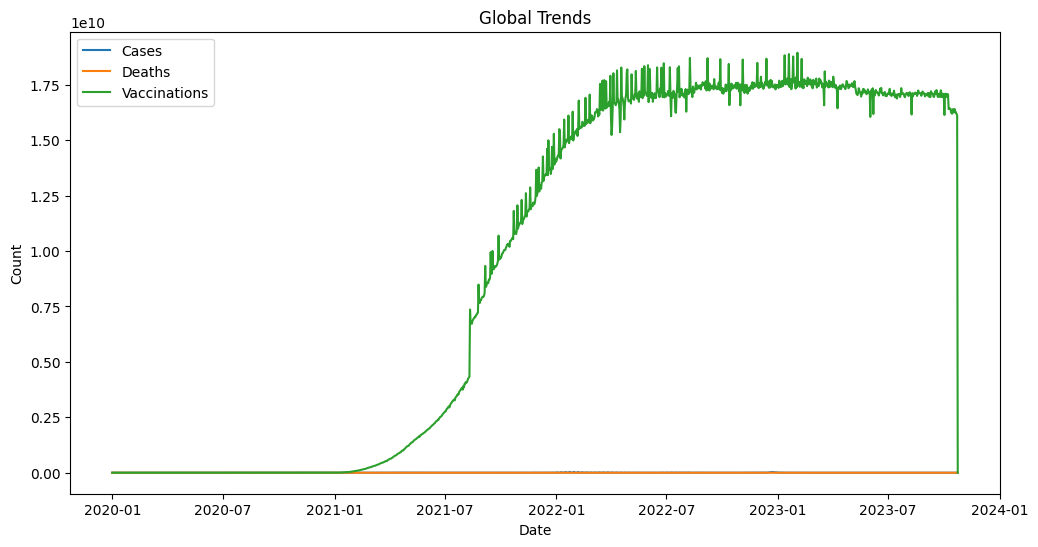

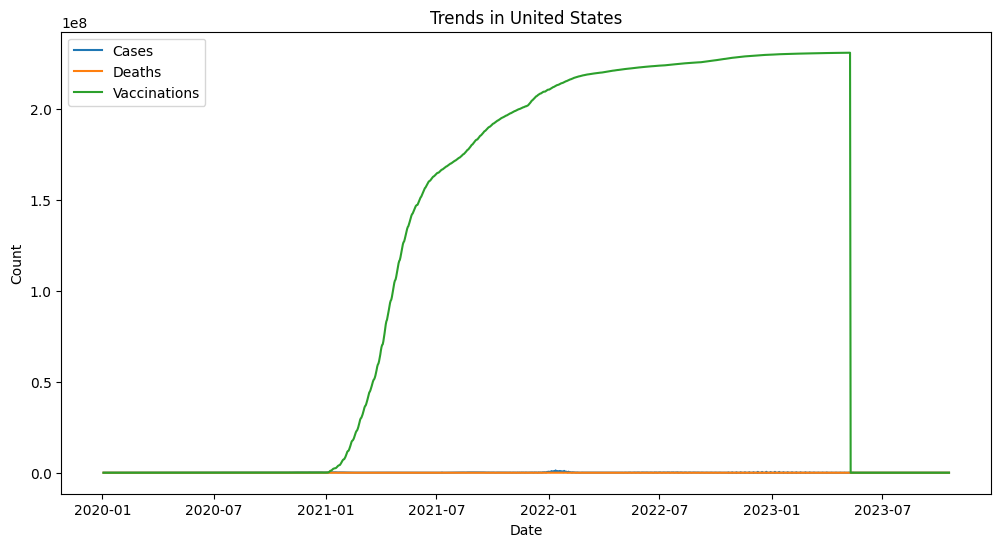

In [15]:
import matplotlib.pyplot as plt

df = pd.read_csv("covid-dataset.csv")
df['date'] = pd.to_datetime(df['date'])

# Global trends
global_cases = df.groupby('date')['new_cases'].sum()
global_deaths = df.groupby('date')['new_deaths'].sum()
global_vaccinations = df.groupby('date')['people_fully_vaccinated'].sum()

plt.figure(figsize=(12, 6))
plt.plot(global_cases, label='Cases')
plt.plot(global_deaths, label='Deaths')
plt.plot(global_vaccinations, label='Vaccinations')
plt.title('Global Trends')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

# Trends by country (example: United States)
country = 'United States'
country_data = df[df['location'] == country]
country_cases = country_data.groupby('date')['new_cases'].sum()
country_deaths = country_data.groupby('date')['new_deaths'].sum()
country_vaccinations = country_data.groupby('date')['people_fully_vaccinated'].sum()

plt.figure(figsize=(12, 6))
plt.plot(country_cases, label='Cases')
plt.plot(country_deaths, label='Deaths')
plt.plot(country_vaccinations, label='Vaccinations')
plt.title(f'Trends in {country}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

**QUESTION 7:**

In [16]:
df = pd.read_csv("covid-dataset.csv")
df['date'] = pd.to_datetime(df['date'])

cases_peak_date = df.loc[df['new_cases'].idxmax(), 'date']
deaths_peak_date = df.loc[df['new_deaths'].idxmax(), 'date']
vaccinations_peak_date = df.loc[df['people_fully_vaccinated'].idxmax(), 'date']

print("Peak Date for New Cases:", cases_peak_date)
print("Peak Date for New Deaths:", deaths_peak_date)
print("Peak Date for People Fully Vaccinated:", vaccinations_peak_date)

Peak Date for New Cases: 2022-01-30 00:00:00
Peak Date for New Deaths: 2021-01-24 00:00:00
Peak Date for People Fully Vaccinated: 2023-10-23 00:00:00


**QUESTION 8:**

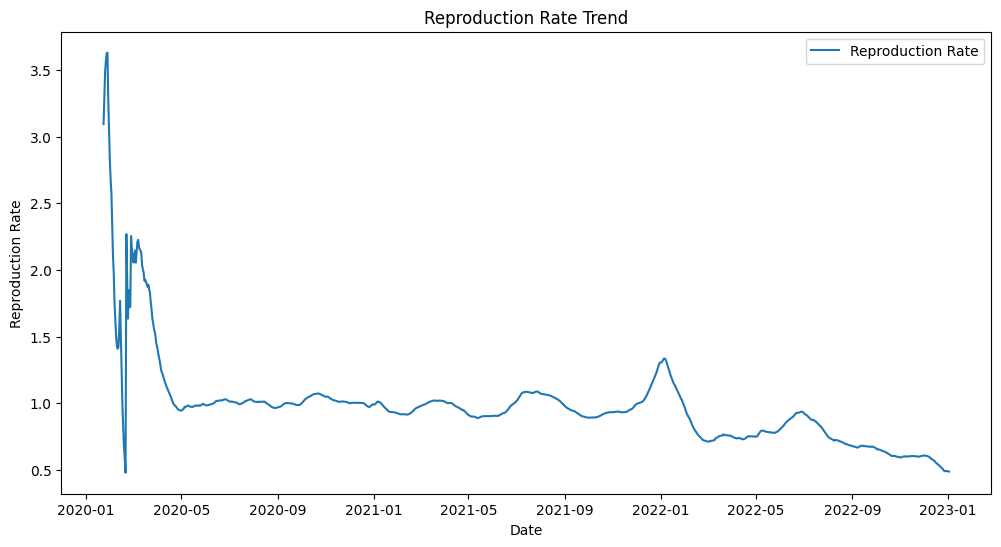

In [17]:
df['date'] = pd.to_datetime(df['date'])

reproduction_rate = df.groupby('date')['reproduction_rate'].mean()

plt.figure(figsize=(12, 6))
plt.plot(reproduction_rate, label='Reproduction Rate')
plt.title('Reproduction Rate Trend')
plt.xlabel('Date')
plt.ylabel('Reproduction Rate')
plt.legend()
plt.show()

**QUESTION 9:**

In [18]:
import pandas as pd

df = pd.read_csv("covid-dataset.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

weekly_icu_admissions = df['icu_patients'].resample('W').sum()
weekly_hosp_admissions = df['hosp_patients'].resample('W').sum()

print("Weekly ICU Admissions:\n", weekly_icu_admissions)
print("\nWeekly Hospital Admissions:\n", weekly_hosp_admissions)

Weekly ICU Admissions:
 date
2020-01-05        0.0
2020-01-12        0.0
2020-01-19        0.0
2020-01-26        0.0
2020-02-02        0.0
               ...   
2023-10-01    15813.0
2023-10-08    15081.0
2023-10-15     9473.0
2023-10-22     1161.0
2023-10-29       58.0
Freq: W-SUN, Name: icu_patients, Length: 200, dtype: float64

Weekly Hospital Admissions:
 date
2020-01-05         0.0
2020-01-12         1.0
2020-01-19         1.0
2020-01-26         0.0
2020-02-02         0.0
                ...   
2023-10-01    210790.0
2023-10-08    209784.0
2023-10-15    153991.0
2023-10-22     37041.0
2023-10-29      1961.0
Freq: W-SUN, Name: hosp_patients, Length: 200, dtype: float64


**QUESTION 10:**

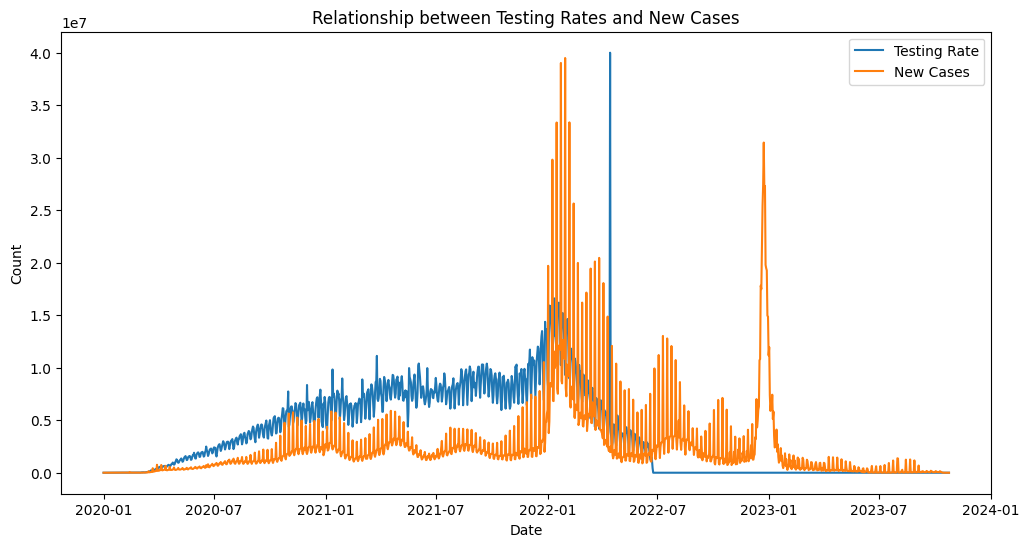

Correlation between Testing Rate and New Cases: 0.2768402455374144


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("covid-dataset.csv")
df['date'] = pd.to_datetime(df['date'])

testing_rate = df.groupby('date')['new_tests'].sum()
new_cases = df.groupby('date')['new_cases'].sum()

plt.figure(figsize=(12, 6))
plt.plot(testing_rate, label='Testing Rate')
plt.plot(new_cases, label='New Cases')
plt.title('Relationship between Testing Rates and New Cases')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

correlation = testing_rate.corr(new_cases)
print("Correlation between Testing Rate and New Cases:", correlation)

**QUESTION 11:**

In [20]:
continent_data = df.groupby('continent')[['total_cases', 'total_deaths', 'people_fully_vaccinated']].sum()

print(continent_data)

                total_cases  total_deaths  people_fully_vaccinated
continent                                                         
Africa         1.083214e+10  2.323232e+08             2.249566e+10
Asia           1.654005e+11  1.320176e+09             1.039623e+12
Europe         1.637914e+11  1.754923e+09             2.599853e+11
North America  9.119385e+10  1.403034e+09             2.025708e+11
Oceania        7.324359e+09  1.462233e+07             7.968658e+09
South America  5.370432e+10  1.257349e+09             1.476611e+11


**QUESTION 12:**

In [21]:
df['cases_per_million'] = (df['total_cases'] / df['population']) * 1000000
df['deaths_per_million'] = (df['total_deaths'] / df['population']) * 1000000

highest_cases_country = df.loc[df['cases_per_million'].idxmax(), 'location']
highest_deaths_country = df.loc[df['deaths_per_million'].idxmax(), 'location']

print("Country with highest cases per million:", highest_cases_country)
print("Country with highest deaths per million:", highest_deaths_country)

Country with highest cases per million: Cyprus
Country with highest deaths per million: Peru


**QUESTION 13:**

In [22]:
continent_testing_rates = df.groupby('continent')['new_tests'].sum()
print("Continent Testing Rates:\n", continent_testing_rates)

country_testing_rates = df.groupby('location')['new_tests'].sum()
print("\nCountry Testing Rates:\n", country_testing_rates)

highest_testing_country = country_testing_rates.idxmax()
print("\nCountry with highest testing rate:", highest_testing_country)

lowest_testing_country = country_testing_rates.idxmin()
print("\nCountry with lowest testing rate:", lowest_testing_country)

Continent Testing Rates:
 continent
Africa           6.153282e+07
Asia             1.798337e+09
Europe           1.954534e+09
North America    1.017159e+09
Oceania          7.840947e+07
South America    1.635488e+08
Name: new_tests, dtype: float64

Country Testing Rates:
 location
Afghanistan             0.0
Africa                  0.0
Albania           1613870.0
Algeria                 0.0
American Samoa          0.0
                    ...    
Western Sahara          0.0
World                   0.0
Yemen                   0.0
Zambia            3412336.0
Zimbabwe          1869683.0
Name: new_tests, Length: 255, dtype: float64

Country with highest testing rate: United States

Country with lowest testing rate: Afghanistan


**QUESTION 14:**

In [23]:
continent_beds = df.groupby('continent')['hospital_beds_per_thousand'].mean()
print("Hospital Beds per Thousand by Continent:\n", continent_beds)

Hospital Beds per Thousand by Continent:
 continent
Africa           1.505500
Asia             3.233680
Europe           5.164517
North America    2.316463
Oceania          3.016733
South America    2.069435
Name: hospital_beds_per_thousand, dtype: float64


**QUESTION 15:**

In [24]:
df['cases_per_100k'] = (df['total_cases'] / df['population']) * 100000
df['deaths_per_100k'] = (df['total_deaths'] / df['population']) * 100000

correlation_cases = df['life_expectancy'].corr(df['cases_per_100k'])
correlation_deaths = df['life_expectancy'].corr(df['deaths_per_100k'])

print("Correlation between Life Expectancy and Cases per 100k:", correlation_cases)
print("Correlation between Life Expectancy and Deaths per 100k:", correlation_deaths)

Correlation between Life Expectancy and Cases per 100k: 0.4428359639776067
Correlation between Life Expectancy and Deaths per 100k: 0.38305499148369027


**QUESTION 16:**

In [25]:
df.dropna(subset=['hospital_beds_per_thousand', 'total_cases', 'total_deaths'], inplace=True)

df['fatality_rate'] = (df['total_deaths'] / df['total_cases']) * 100
df = df[df['fatality_rate'] <= 100]

correlation = df['hospital_beds_per_thousand'].corr(df['fatality_rate'])

print("Correlation between Hospital Beds per Thousand and Fatality Rate:", correlation)

Correlation between Hospital Beds per Thousand and Fatality Rate: -0.11314076252307148


**QUESTION 17:**

In [26]:
icu_by_country = df.groupby('location')['icu_patients'].sum()
deaths_by_country = df.groupby('location')['total_deaths'].sum()

high_icu_countries = icu_by_country[icu_by_country > icu_by_country.quantile(0.90)].index.tolist()
high_death_countries = deaths_by_country[deaths_by_country > deaths_by_country.quantile(0.90)].index.tolist()

print("Countries with High ICU Admissions: ", high_icu_countries)
print("Countries with High Deaths: ", high_death_countries)

Countries with High ICU Admissions:  ['Argentina', 'Austria', 'Belgium', 'Canada', 'Chile', 'Czechia', 'France', 'Germany', 'Italy', 'Malaysia', 'Netherlands', 'Slovakia', 'South Africa', 'South Korea', 'Spain', 'United Kingdom', 'United States']
Countries with High Deaths:  ['Argentina', 'Brazil', 'Colombia', 'France', 'Germany', 'India', 'Indonesia', 'Iran', 'Italy', 'Mexico', 'Peru', 'Poland', 'Russia', 'Spain', 'United Kingdom', 'United States', 'World']


**QUESTION 18:**

In [27]:
correlation = df['handwashing_facilities'].corr(df['new_cases'])
print("Correlation between Handwashing Facilities and New Cases:", correlation)

Correlation between Handwashing Facilities and New Cases: 0.015213659744232902


**QUESTION 19:**

In [101]:
df['positive_rate'] = (df['new_cases'] / df['new_tests']) * 100

correlation = df['positive_rate'].corr(df['new_cases'])
print(f"Correlation between Positive Test Rate and Cases Detected: {correlation}")

Correlation between Positive Test Rate and Cases Detected: 0.08940244706587903


**QUESTION 20:**

In [29]:
correlation_beds = df['hospital_beds_per_thousand'].corr(df['total_vaccinations'])
print(f"Correlation between Hospital Beds per Thousand and Total Vaccinations: {correlation_beds}")

correlation_icu = df['icu_patients'].corr(df['total_vaccinations'])
print(f"Correlation between ICU Patients and Total Vaccinations: {correlation_icu}")

Correlation between Hospital Beds per Thousand and Total Vaccinations: -0.056303008527675676
Correlation between ICU Patients and Total Vaccinations: 0.4025248322084548


**QUESTION 21:**

In [102]:
df['vaccination_rate'] = (df['people_fully_vaccinated'] / df['population']) * 100

correlation = df['gdp_per_capita'].corr(df['vaccination_rate'])
print(f"Correlation between GDP per capita and Vaccination Rate: {correlation}")

Correlation between GDP per capita and Vaccination Rate: 0.3620652742722249


**QUESTION 22:**

In [103]:
df['cases_per_100k'] = (df['total_cases'] / df['population']) * 100000

correlation = df['extreme_poverty'].corr(df['cases_per_100k'])
print(f"Correlation between Extreme Poverty and COVID-19 Case Rates: {correlation}")

Correlation between Extreme Poverty and COVID-19 Case Rates: -0.3510530414341344


**QUESTION 23:**

In [104]:
df['cases_per_100k'] = (df['total_cases'] / df['population']) * 100000

correlation = df['population_density'].corr(df['cases_per_100k'])
print(f"Correlation between Population Density and COVID-19 Case Rates: {correlation}")

Correlation between Population Density and COVID-19 Case Rates: 0.10556263761865077


**QUESTION 24:**

In [105]:
df['cases_per_100k'] = (df['total_cases'] / df['population']) * 100000
df['deaths_per_100k'] = (df['total_deaths'] / df['population']) * 100000
age_group_data = df.groupby(['median_age', 'aged_65_older', 'aged_70_older'])[['cases_per_100k', 'deaths_per_100k']].mean()
print("Case and Death Rates Across Age Groups:\n", age_group_data)

Case and Death Rates Across Age Groups:
                                         cases_per_100k  deaths_per_100k
median_age aged_65_older aged_70_older                                 
15.1       2.553         1.378               24.580301         0.883908
16.4       2.168         1.308              229.921411         5.377969
           2.519         1.486               90.492734         2.356787
16.7       2.486         1.446               29.836513         0.917105
16.8       2.405         1.362              180.934820         3.744368
...                                                ...              ...
45.5       19.436        13.799           15703.139360       178.864451
46.2       21.502        14.924           26517.735286       171.016855
46.6       21.453        15.957           19238.598734       120.964733
47.9       23.021        16.240           19769.390135       216.215026
48.2       27.049        18.493            8709.769214        23.408073

[192 rows x 2 columns]

**QUESTION 25:**

In [34]:
correlation_male = df['male_smokers'].corr(df['total_deaths'])
correlation_female = df['female_smokers'].corr(df['total_deaths'])
print(f"Correlation between Male Smoking Prevalence and Total Deaths: {correlation_male}")
print(f"Correlation between Female Smoking Prevalence and Total Deaths: {correlation_female}")

Correlation between Male Smoking Prevalence and Total Deaths: 0.003041669614499276
Correlation between Female Smoking Prevalence and Total Deaths: -0.011547425680297123


**QUESTION 26:**

In [35]:
correlation = df['stringency_index'].corr(df['new_cases'])
print(f"Correlation between Stringency Index and New Cases: {correlation}")

Correlation between Stringency Index and New Cases: 0.009908623615191113


**QUESTION 27:**

In [36]:
strictest_countries = df.loc[df['stringency_index'] > df['stringency_index'].quantile(0.90), 'location'].unique()
print("Countries with Strictest Policies:", strictest_countries)

Countries with Strictest Policies: ['Afghanistan' 'Albania' 'Algeria' 'Argentina' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bangladesh' 'Barbados' 'Belgium' 'Belize' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Burkina Faso' 'Cambodia'
 'Cape Verde' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba'
 'Cyprus' 'Czechia' 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Eswatini' 'Ethiopia' 'Fiji' 'Gabon' 'Georgia' 'Germany'
 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'Hungary'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati' 'Kuwait' 'Laos' 'Lebanon'
 'Liberia' 'Libya' 'Lithuania' 'Luxembourg' 'Madagascar' 'Malaysia'
 'Malta' 'Mauritius' 'Mexico' 'Moldova' 'Mongolia' 'Morocco' 'Mozambique'
 'Myanmar' 'Nepal' 'Netherlands' 'New Zealand' 'Norway' 'Oman' 'Pakistan'
 'Panama' 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal' 'Qatar'
 'Romania' 'Russia' 'San Marino' 'Saudi Ar

**QUESTION 28:**

In [37]:
df['date'] = pd.to_datetime(df['date'])
df['vaccination_rate'] = (df['people_fully_vaccinated'] / df['population']) * 100
correlation = df.groupby('date')[['vaccination_rate', 'stringency_index']].corr().iloc[0::2, -1]
print("Correlation between Vaccination Rates and Stringency Index over Time:\n", correlation)

Correlation between Vaccination Rates and Stringency Index over Time:
 date                        
2020-01-06  vaccination_rate   NaN
2020-01-07  vaccination_rate   NaN
2020-01-08  vaccination_rate   NaN
2020-01-09  vaccination_rate   NaN
2020-01-10  vaccination_rate   NaN
                                ..
2023-10-14  vaccination_rate   NaN
2023-10-15  vaccination_rate   NaN
2023-10-16  vaccination_rate   NaN
2023-10-17  vaccination_rate   NaN
2023-10-18  vaccination_rate   NaN
Name: stringency_index, Length: 1382, dtype: float64


**QUESTION 29:**

In [38]:
df['positive_rate'] = (df['new_cases'] / df['new_tests']) * 100
print("Test Positivity Rates by Country over Time:\n", df[['location', 'date', 'positive_rate']])

Test Positivity Rates by Country over Time:
            location       date  positive_rate
81      Afghanistan 2020-03-24            NaN
82      Afghanistan 2020-03-25            NaN
83      Afghanistan 2020-03-26            NaN
84      Afghanistan 2020-03-27            NaN
85      Afghanistan 2020-03-28            NaN
...             ...        ...            ...
350080     Zimbabwe 2023-10-14            NaN
350081     Zimbabwe 2023-10-15            NaN
350082     Zimbabwe 2023-10-16            NaN
350083     Zimbabwe 2023-10-17            NaN
350084     Zimbabwe 2023-10-18            NaN

[212633 rows x 3 columns]


**QUESTION 30:**

In [39]:
df['tests_per_case'] = df['new_tests'] / df['new_cases']
highest_tests_country = df.loc[df['tests_per_case'].idxmax(), 'location']
lowest_tests_country = df.loc[df['tests_per_case'].idxmin(), 'location']
print("Country with Highest Tests per Case:", highest_tests_country)
print("Country with Lowest Tests per Case:", lowest_tests_country)

Country with Highest Tests per Case: Argentina
Country with Lowest Tests per Case: Netherlands


**QUESTION 31:**

In [40]:
print("Excess Mortality Trends by Country and Continent:\n", df[['location', 'continent', 'excess_mortality']])

Excess Mortality Trends by Country and Continent:
            location continent  excess_mortality
81      Afghanistan      Asia               NaN
82      Afghanistan      Asia               NaN
83      Afghanistan      Asia               NaN
84      Afghanistan      Asia               NaN
85      Afghanistan      Asia               NaN
...             ...       ...               ...
350080     Zimbabwe    Africa               NaN
350081     Zimbabwe    Africa               NaN
350082     Zimbabwe    Africa               NaN
350083     Zimbabwe    Africa               NaN
350084     Zimbabwe    Africa               NaN

[212633 rows x 3 columns]


**QUESTION 32:**

In [41]:
df['vaccination_rate'] = (df['people_fully_vaccinated'] / df['population']) * 100
df['vaccination_rate_relative_to_gdp'] = df['vaccination_rate'] / df['gdp_per_capita']
print("Vaccination Rates Relative to GDP per Capita:\n", df[['location', 'vaccination_rate_relative_to_gdp']])

Vaccination Rates Relative to GDP per Capita:
            location  vaccination_rate_relative_to_gdp
81      Afghanistan                               NaN
82      Afghanistan                               NaN
83      Afghanistan                               NaN
84      Afghanistan                               NaN
85      Afghanistan                               NaN
...             ...                               ...
350080     Zimbabwe                               NaN
350081     Zimbabwe                               NaN
350082     Zimbabwe                               NaN
350083     Zimbabwe                               NaN
350084     Zimbabwe                               NaN

[212633 rows x 2 columns]


**QUESTION 33:**

In [42]:
correlation = df['reproduction_rate'].corr(df['total_tests'])
print(f"Correlation between Reproduction Rate and Total Tests Conducted: {correlation}")

Correlation between Reproduction Rate and Total Tests Conducted: -0.024131594334957547


**QUESTION 34:**

In [43]:
highest_booster_country = df.loc[df['total_boosters'].idxmax(), 'location']
print("Country with Highest Booster Coverage:", highest_booster_country)

Country with Highest Booster Coverage: World


**QUESTION 35:**

In [44]:
daily_vaccinations_global = df.groupby('date')['new_vaccinations'].sum()
print("Global Daily Vaccinations:\n", daily_vaccinations_global)
daily_vaccinations_region = df.groupby(['date', 'continent'])['new_vaccinations'].sum()
print("\nDaily Vaccinations by Region:\n", daily_vaccinations_region)

Global Daily Vaccinations:
 date
2020-01-06        0.0
2020-01-07        0.0
2020-01-08        0.0
2020-01-09        0.0
2020-01-10        0.0
               ...   
2023-10-14     3224.0
2023-10-15     2184.0
2023-10-16     8565.0
2023-10-17    27761.0
2023-10-18    15241.0
Name: new_vaccinations, Length: 1382, dtype: float64

Daily Vaccinations by Region:
 date        continent    
2020-01-12  Asia                0.0
2020-01-13  Asia                0.0
2020-01-14  Asia                0.0
2020-01-15  Asia                0.0
2020-01-16  Asia                0.0
                              ...  
2023-10-18  Asia              228.0
            Europe           7667.0
            North America       0.0
            Oceania             0.0
            South America    7346.0
Name: new_vaccinations, Length: 8027, dtype: float64


**QUESTION 36:**

In [45]:
correlation_cases = df['total_boosters'].corr(df['new_cases'])
correlation_deaths = df['total_boosters'].corr(df['new_deaths'])
print(f"Correlation between Boosters and New Cases: {correlation_cases}")
print(f"Correlation between Boosters and New Deaths: {correlation_deaths}")

Correlation between Boosters and New Cases: 0.3679974286679062
Correlation between Boosters and New Deaths: 0.18400634369889063


**QUESTION 37:**

In [46]:
df['vaccination_rate'] = (df['people_fully_vaccinated'] / df['population']) * 100
top_countries = df.sort_values('vaccination_rate', ascending=False)['location'].head(10)  # Adjust 'head(10)' for more countries
print("Top Countries with Full Vaccination:", top_countries)

Top Countries with Full Vaccination: 253247    Qatar
253240    Qatar
253226    Qatar
253219    Qatar
253212    Qatar
253205    Qatar
253198    Qatar
253191    Qatar
253184    Qatar
253177    Qatar
Name: location, dtype: object


**QUESTION 38:**

In [47]:
total_cases = df['total_cases'].sum()
total_deaths = df['total_deaths'].sum()
total_vaccinations = df['people_fully_vaccinated'].sum()
print("Total Cases:", total_cases)
print("Total Deaths:", total_deaths)
print("Total Vaccinations:", total_vaccinations)

Total Cases: 980668035971.0
Total Deaths: 11928756338.0
Total Vaccinations: 5321530258088.0


**QUESTION 39:**

In [48]:
top_cases = df.groupby('location')['total_cases'].sum().sort_values(ascending=False).head(10)
top_deaths = df.groupby('location')['total_deaths'].sum().sort_values(ascending=False).head(10)
print("Top 10 Countries by Total Cases:\n", top_cases)
print("\nTop 10 Countries by Total Deaths:\n", top_deaths)

Top 10 Countries by Total Cases:
 location
World             4.922466e+11
United States     7.608125e+10
India             3.910818e+10
China             3.117667e+10
Brazil            2.948251e+10
France            2.392808e+10
Germany           2.219824e+10
United Kingdom    1.759545e+10
Italy             1.583802e+10
Russia            1.583597e+10
Name: total_cases, dtype: float64

Top 10 Countries by Total Deaths:
 location
World             5.982427e+09
United States     9.619765e+08
Brazil            6.433720e+08
India             4.829695e+08
Mexico            3.250405e+08
Russia            3.143106e+08
Peru              2.196656e+08
United Kingdom    2.107123e+08
Italy             1.702823e+08
France            1.471634e+08
Name: total_deaths, dtype: float64


**QUESTION 40:**

In [49]:
df['vaccination_rate'] = (df['people_fully_vaccinated'] / df['population']) * 100
ranked_countries = df.sort_values('vaccination_rate', ascending=False)[['location', 'vaccination_rate']]
print("Countries Ranked by Vaccination Rate:\n", ranked_countries)

Countries Ranked by Vaccination Rate:
         location  vaccination_rate
253247     Qatar        105.827064
253240     Qatar        105.824800
253226     Qatar        105.822685
253219     Qatar        105.821647
253212     Qatar        105.820459
...          ...               ...
350080  Zimbabwe               NaN
350081  Zimbabwe               NaN
350082  Zimbabwe               NaN
350083  Zimbabwe               NaN
350084  Zimbabwe               NaN

[212633 rows x 2 columns]


**QUESTION 41:**

In [50]:
continent_data = df.groupby('continent')[['total_cases', 'total_deaths', 'people_fully_vaccinated']].sum()
print("Cases, Deaths, and Vaccinations by Continent:\n", continent_data)

Cases, Deaths, and Vaccinations by Continent:
                 total_cases  total_deaths  people_fully_vaccinated
continent                                                         
Africa         9.537330e+09  2.156919e+08             1.983430e+10
Asia           1.646753e+11  1.314808e+09             1.022175e+12
Europe         1.634195e+11  1.749890e+09             2.268787e+11
North America  9.005565e+10  1.396008e+09             2.024749e+11
Oceania        7.102574e+09  1.292435e+07             7.924102e+09
South America  5.363103e+10  1.257008e+09             1.475448e+11


**QUESTION 42:**

In [51]:
global_cfr = (df['total_deaths'].sum() / df['total_cases'].sum()) * 100
country_cfr = (df.groupby('location')['total_deaths'].sum() / df.groupby('location')['total_cases'].sum()) * 100
continent_cfr = (df.groupby('continent')['total_deaths'].sum() / df.groupby('continent')['total_cases'].sum()) * 100
print("Global CFR:", global_cfr)
print("\nCFR by Country:\n", country_cfr)
print("\nCFR by Continent:\n", continent_cfr)

Global CFR: 1.2163908581142695

CFR by Country:
 location
Afghanistan             4.011218
Albania                 1.266378
Algeria                 2.644244
Antigua and Barbuda     1.780424
Argentina               1.564867
                         ...    
Vietnam                 0.447020
World                   1.215331
Yemen                  18.939288
Zambia                  1.295076
Zimbabwe                2.371310
Length: 171, dtype: float64

CFR by Continent:
 continent
Africa           2.261554
Asia             0.798424
Europe           1.070796
North America    1.550161
Oceania          0.181967
South America    2.343807
dtype: float64


**QUESTION 43:**

In [52]:
df['date'] = pd.to_datetime(df['date'])
daily_trends = df.groupby('date')[['new_cases', 'new_deaths', 'new_vaccinations']].sum()
cumulative_trends = daily_trends.cumsum()
print("Daily Trends:\n", daily_trends)
print("\nCumulative Trends:\n", cumulative_trends)

Daily Trends:
             new_cases  new_deaths  new_vaccinations
date                                               
2020-01-06        3.0         0.0               0.0
2020-01-07        0.0         0.0               0.0
2020-01-08        1.0         0.0               0.0
2020-01-09        0.0         0.0               0.0
2020-01-10        0.0         0.0               0.0
...               ...         ...               ...
2023-10-14     2354.0         8.0            3224.0
2023-10-15     3334.0       110.0            2184.0
2023-10-16        0.0         0.0            8565.0
2023-10-17        0.0         0.0           27761.0
2023-10-18        0.0         0.0           15241.0

[1382 rows x 3 columns]

Cumulative Trends:
                new_cases  new_deaths  new_vaccinations
date                                                  
2020-01-06  3.000000e+00         0.0      0.000000e+00
2020-01-07  3.000000e+00         0.0      0.000000e+00
2020-01-08  4.000000e+00         0.0      0

**QUESTION 44:**

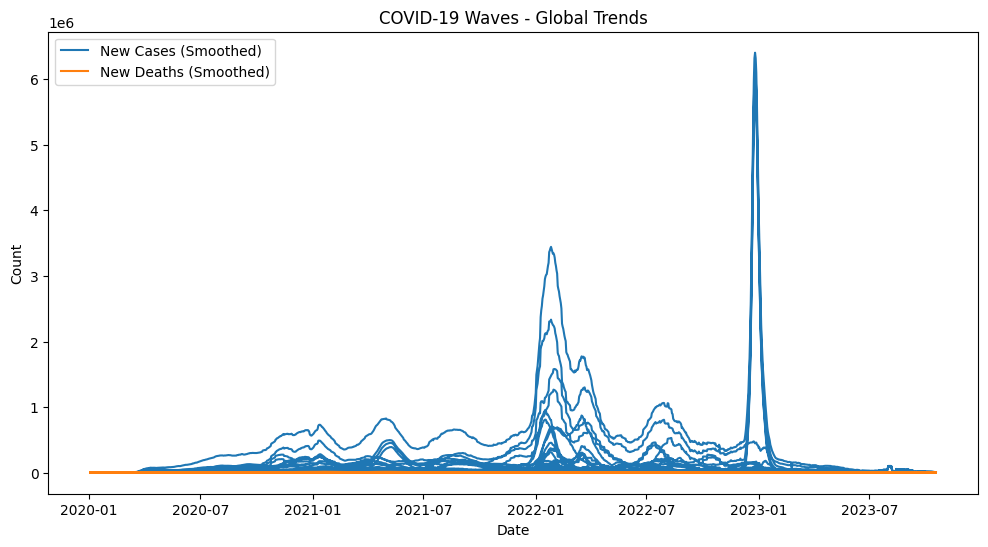

In [53]:
import matplotlib.pyplot as plt

df = pd.read_csv("covid-dataset.csv")
df['date'] = pd.to_datetime(df['date'])

df['new_cases_smoothed'] = df['new_cases'].rolling(window=7).mean()
df['new_deaths_smoothed'] = df['new_deaths'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['new_cases_smoothed'], label='New Cases (Smoothed)')
plt.plot(df['date'], df['new_deaths_smoothed'], label='New Deaths (Smoothed)')
plt.title('COVID-19 Waves - Global Trends')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

**QUESTION 45:**

In [54]:
correlation = df['reproduction_rate'].corr(df['new_cases'])
print(f"Correlation between Reproduction Rate and New Cases: {correlation}")

Correlation between Reproduction Rate and New Cases: 0.024836134984609234


**QUESTION 46:**

In [55]:
continent_trends = df.groupby(['continent', 'date'])[['new_cases', 'new_deaths']].sum().rolling(window=7).mean()
continent_peaks = continent_trends.groupby('continent').idxmax()

print("Peak Dates for New Cases and Deaths by Continent:\n", continent_peaks)

Peak Dates for New Cases and Deaths by Continent:
                                           new_cases  \
continent                                             
Africa                (Africa, 2022-01-06 00:00:00)   
Asia                    (Asia, 2022-12-26 00:00:00)   
Europe                (Europe, 2022-02-01 00:00:00)   
North America  (North America, 2022-01-17 00:00:00)   
Oceania              (Oceania, 2022-01-14 00:00:00)   
South America  (South America, 2022-01-25 00:00:00)   

                                         new_deaths  
continent                                            
Africa                (Africa, 2021-08-07 00:00:00)  
Asia                    (Asia, 2021-05-22 00:00:00)  
Europe                (Europe, 2021-01-24 00:00:00)  
North America  (North America, 2021-01-19 00:00:00)  
Oceania              (Oceania, 2023-06-17 00:00:00)  
South America  (South America, 2021-04-14 00:00:00)  


**QUESTION 47:**

In [56]:
df['peak_period'] = [random.choice([True, False]) for _ in range(len(df))]  # Sample peak periods

peak_period_data = df[df['peak_period'] == True]
icu_hosp_trends = peak_period_data.groupby('date')[['icu_patients', 'hosp_patients']].mean()
print("ICU and Hospitalization Trends During Peak Periods:\n", icu_hosp_trends)

ICU and Hospitalization Trends During Peak Periods:
             icu_patients  hosp_patients
date                                   
2020-01-01           NaN            NaN
2020-01-02           NaN            NaN
2020-01-03           NaN            NaN
2020-01-04           NaN            NaN
2020-01-05           NaN            NaN
...                  ...            ...
2023-10-20          22.0     397.000000
2023-10-21          23.0     282.000000
2023-10-22           NaN     457.000000
2023-10-23          21.5     377.666667
2023-10-24          15.0     414.000000

[1393 rows x 2 columns]


**QUESTION 48:**

In [57]:
df['cases_per_million'] = (df['total_cases'] / df['population']) * 1000000
df['deaths_per_million'] = (df['total_deaths'] / df['population']) * 1000000
top_cases_per_million = df.sort_values('cases_per_million', ascending=False)['location'].head(5)
lowest_cases_per_million = df.sort_values('cases_per_million')['location'].head(5)
top_deaths_per_million = df.sort_values('deaths_per_million', ascending=False)['location'].head(5)
lowest_deaths_per_million = df.sort_values('deaths_per_million')['location'].head(5)
print("Top 5 Countries by Cases per Million:", top_cases_per_million)
print("\nLowest 5 Countries by Cases per Million:", lowest_cases_per_million)
print("\nTop 5 Countries by Deaths per Million:", top_deaths_per_million)
print("\nLowest 5 Countries by Deaths per Million:", lowest_deaths_per_million)

Top 5 Countries by Cases per Million: 76132    Cyprus
76066    Cyprus
76096    Cyprus
76097    Cyprus
76098    Cyprus
Name: location, dtype: object

Lowest 5 Countries by Cases per Million: 16631                    Asia
16632                    Asia
344542                  World
177202    Lower middle income
344541                  World
Name: location, dtype: object

Top 5 Countries by Deaths per Million: 245082    Peru
245067    Peru
245069    Peru
245070    Peru
245071    Peru
Name: location, dtype: object

Lowest 5 Countries by Deaths per Million: 16640    Asia
16643    Asia
16642    Asia
16641    Asia
16639    Asia
Name: location, dtype: object


**QUESTION 49:**

In [58]:
df['case_fatality_rate'] = (df['total_deaths'] / df['total_cases']) * 100
average_cfr = df['case_fatality_rate'].mean()
outliers = df[(df['case_fatality_rate'] > average_cfr * 2) | (df['case_fatality_rate'] < average_cfr / 2)]
print("Countries with Disproportionate Case Fatality Rates:\n", outliers[['location', 'case_fatality_rate']])

Countries with Disproportionate Case Fatality Rates:
            location  case_fatality_rate
81      Afghanistan            2.500000
82      Afghanistan            2.380952
83      Afghanistan            1.351351
84      Afghanistan            1.351351
85      Afghanistan            2.500000
...             ...                 ...
350080     Zimbabwe            2.151177
350081     Zimbabwe            2.151177
350082     Zimbabwe            2.151177
350083     Zimbabwe            2.151177
350084     Zimbabwe            2.151177

[281644 rows x 2 columns]


**QUESTION 50:**

In [59]:
df['tests_per_thousand'] = (df['total_tests'] / df['population']) * 1000
testing_density_country = df.groupby('location')['tests_per_thousand'].mean()
testing_density_continent = df.groupby('continent')['tests_per_thousand'].mean()
print("Testing Density by Country:\n", testing_density_country)
print("\nTesting Density by Continent:\n", testing_density_continent)

Testing Density by Country:
 location
Afghanistan        22.481712
Africa                   NaN
Albania           196.897130
Algeria             5.134442
American Samoa           NaN
                     ...    
Western Sahara      6.845427
World                    NaN
Yemen               9.890149
Zambia             78.247974
Zimbabwe           43.069820
Name: tests_per_thousand, Length: 255, dtype: float64

Testing Density by Continent:
 continent
Africa             76.821261
Asia              777.481730
Europe           1755.595946
North America     412.289197
Oceania           639.702442
South America     320.674110
Name: tests_per_thousand, dtype: float64


**QUESTION 51**

In [60]:
df['vaccination_rate'] = (df['people_fully_vaccinated'] / df['population']) * 100
top_vaccinated_countries = df.sort_values('vaccination_rate', ascending=False).head(10)
print("Countries with Highest Vaccination Rates:\n", top_vaccinated_countries[['location', 'vaccination_rate']])

Countries with Highest Vaccination Rates:
          location  vaccination_rate
117373  Gibraltar        126.893534
117134  Gibraltar        126.758882
117127  Gibraltar        126.697677
117120  Gibraltar        126.498761
117119  Gibraltar        126.483459
117118  Gibraltar        126.474279
117117  Gibraltar        126.440616
117113  Gibraltar        126.419194
117111  Gibraltar        126.342688
117107  Gibraltar        126.223338


**QUESTION 52:**

In [61]:
df['cases_per_million'] = (df['total_cases'] / df['population']) * 1000000
df['deaths_per_million'] = (df['total_deaths'] / df['population']) * 1000000

correlation_cases = df['population_density'].corr(df['cases_per_million'])
correlation_deaths = df['population_density'].corr(df['deaths_per_million'])

print("Correlation between Population Density and Cases per Million:", correlation_cases)
print("Correlation between Population Density and Deaths per Million:", correlation_deaths)

Correlation between Population Density and Cases per Million: 0.10556263761865071
Correlation between Population Density and Deaths per Million: 0.012370182896037394


**QUESTION 53:** Countries with the Fastest Vaccination Rollouts (New Vaccinations Smoothed)

In [62]:
df['date'] = pd.to_datetime(df['date'])
df['new_vaccinations_smoothed'] = df['new_vaccinations'].rolling(window=7).mean()
fastest_rollouts = df.groupby('location')['new_vaccinations_smoothed'].max().sort_values(ascending=False).head(10)
print("Countries with Fastest Vaccination Rollouts:\n", fastest_rollouts)

Countries with Fastest Vaccination Rollouts:
 location
World                  4.369117e+07
Asia                   3.384441e+07
Upper middle income    2.732815e+07
China                  2.242429e+07
Lower middle income    1.705507e+07
India                  1.003800e+07
High income            8.544875e+06
Europe                 5.945446e+06
European Union         4.207012e+06
North America          4.205153e+06
Name: new_vaccinations_smoothed, dtype: float64


**QUESTION 54:**  Compare Vaccination Rates between High-Income and Low-Income Countries

In [63]:
high_income_countries = df[df['gdp_per_capita'] > df['gdp_per_capita'].quantile(0.75)]
low_income_countries = df[df['gdp_per_capita'] < df['gdp_per_capita'].quantile(0.25)]

high_income_vaccination_rate = high_income_countries['people_fully_vaccinated'].sum() / high_income_countries['population'].sum()
low_income_vaccination_rate = low_income_countries['people_fully_vaccinated'].sum() / low_income_countries['population'].sum()

print("Vaccination Rate in High-Income Countries:", high_income_vaccination_rate)
print("Vaccination Rate in Low-Income Countries:", low_income_vaccination_rate)

Vaccination Rate in High-Income Countries: 0.3038317920608351
Vaccination Rate in Low-Income Countries: 0.03460658584588021


**QUESTION 55:**  Study Trends in Booster Doses and Their Impact on Reducing Case and Death Rates

In [64]:
correlation_cases = df['total_boosters'].corr(df['new_cases'])
correlation_deaths = df['total_boosters'].corr(df['new_deaths'])

print("Correlation between Booster Doses and New Cases:", correlation_cases)
print("Correlation between Booster Doses and New Deaths:", correlation_deaths)

Correlation between Booster Doses and New Cases: 0.29074391972531377
Correlation between Booster Doses and New Deaths: 0.12142735900481728


**QUESTION 56:** Compare the Percentage of Fully Vaccinated Individuals with New Cases to Assess Vaccine Effectiveness

In [65]:
df['vaccination_rate'] = (df['people_fully_vaccinated'] / df['population']) * 100

correlation = df['vaccination_rate'].corr(df['new_cases'])
print("Correlation between Vaccination Rate and New Cases:", correlation)

Correlation between Vaccination Rate and New Cases: 0.04494548075910072


**QUESTION 57:** Correlation between Stringency Index and Vaccination Rates over Time

In [66]:
correlation = df.groupby('date')[['vaccination_rate', 'stringency_index']].corr().iloc[0::2, -1]
print("Correlation between Vaccination Rates and Stringency Index over Time:\n", correlation)

Correlation between Vaccination Rates and Stringency Index over Time:
 date                        
2020-01-01  vaccination_rate   NaN
2020-01-02  vaccination_rate   NaN
2020-01-03  vaccination_rate   NaN
2020-01-04  vaccination_rate   NaN
2020-01-05  vaccination_rate   NaN
                                ..
2023-10-20  vaccination_rate   NaN
2023-10-21  vaccination_rate   NaN
2023-10-22  vaccination_rate   NaN
2023-10-23  vaccination_rate   NaN
2023-10-24  vaccination_rate   NaN
Name: stringency_index, Length: 1393, dtype: float64


**QUESTION 58:** Calculate and Compare Test Positivity Rates by Country (positive_rate = new_cases / new_tests)

In [67]:
df['positive_rate'] = (df['new_cases'] / df['new_tests']) * 100
print("Test Positivity Rates by Country:\n", df[['location', 'positive_rate']])

Test Positivity Rates by Country:
            location  positive_rate
0       Afghanistan            NaN
1       Afghanistan            NaN
2       Afghanistan            NaN
3       Afghanistan            NaN
4       Afghanistan            NaN
...             ...            ...
350080     Zimbabwe            NaN
350081     Zimbabwe            NaN
350082     Zimbabwe            NaN
350083     Zimbabwe            NaN
350084     Zimbabwe            NaN

[350085 rows x 2 columns]


**QUESTION 59:** Identify countries with the highest and lowest tests per case ratio.

In [68]:
df['tests_per_case'] = df['new_tests'] / df['new_cases']
highest_tests_country = df.loc[df['tests_per_case'].idxmax(), 'location']
lowest_tests_country = df.loc[df['tests_per_case'].idxmin(), 'location']
print("Country with Highest Tests per Case:", highest_tests_country)
print("Country with Lowest Tests per Case:", lowest_tests_country)

Country with Highest Tests per Case: Albania
Country with Lowest Tests per Case: Netherlands


**QUESTION 60:** Study the effect of testing density on the detection of cases and deaths.

In [69]:
df['testing_density'] = df['total_tests'] / df['population']
correlation_cases = df['testing_density'].corr(df['total_cases'])
correlation_deaths = df['testing_density'].corr(df['total_deaths'])

print("Correlation between Testing Density and Total Cases:", correlation_cases)
print("Correlation between Testing Density and Total Deaths:", correlation_deaths)

Correlation between Testing Density and Total Cases: 0.09487207594459192
Correlation between Testing Density and Total Deaths: 0.03071472780049452


**Question 61:** Relationship between daily testing trends and daily new cases over time.

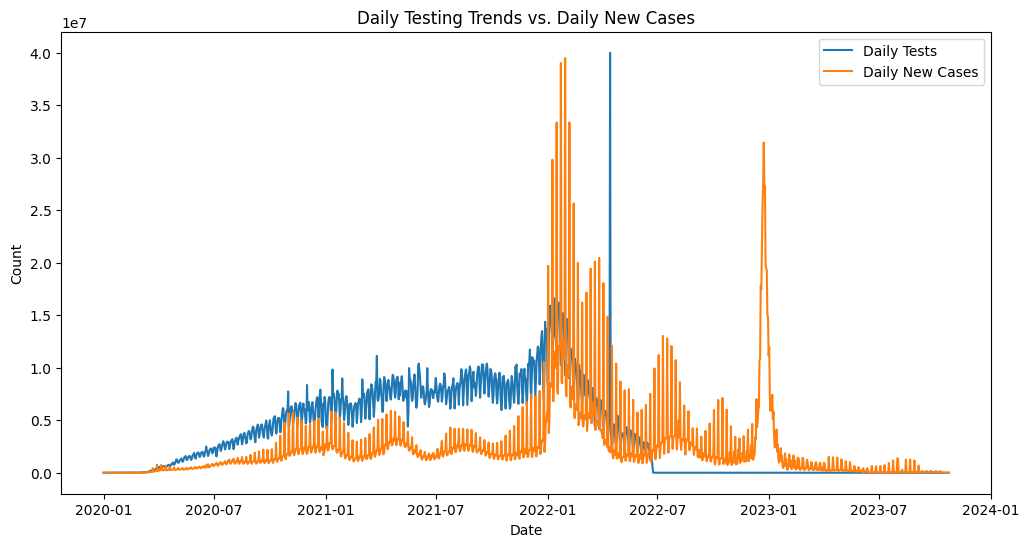

Correlation: 0.2768402455374144


In [70]:
df['date'] = pd.to_datetime(df['date'])

daily_data = df.groupby('date')[['new_tests', 'new_cases']].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['new_tests'], label='Daily Tests')
plt.plot(daily_data.index, daily_data['new_cases'], label='Daily New Cases')
plt.title('Daily Testing Trends vs. Daily New Cases')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

correlation = daily_data['new_tests'].corr(daily_data['new_cases'])
print("Correlation:", correlation)

**Question 62:** Testing strategies of countries with low death rates.

In [71]:
low_death_countries = df.groupby('location')['total_deaths'].sum().sort_values().head(10).index
low_death_data = df[df['location'].isin(low_death_countries)]

testing_strategies = low_death_data[['location', 'total_tests', 'new_tests', 'population']]
print("Testing Strategies of Countries with Low Death Rates:\n", testing_strategies)

Testing Strategies of Countries with Low Death Rates:
        location  total_tests  new_tests  population
88667   England          NaN        NaN  56550000.0
88668   England          NaN        NaN  56550000.0
88669   England          NaN        NaN  56550000.0
88670   England          NaN        NaN  56550000.0
88671   England          NaN        NaN  56550000.0
...         ...          ...        ...         ...
343149    Wales          NaN        NaN   3170000.0
343150    Wales          NaN        NaN   3170000.0
343151    Wales          NaN        NaN   3170000.0
343152    Wales          NaN        NaN   3170000.0
343153    Wales          NaN        NaN   3170000.0

[13468 rows x 4 columns]


**Question 63:** Study the correlation between hospital beds per thousand and deaths per million.

In [72]:
df['deaths_per_million'] = (df['total_deaths'] / df['population']) * 1000000
correlation = df['hospital_beds_per_thousand'].corr(df['deaths_per_million'])
print("Correlation:", correlation)

Correlation: 0.2783114460176078


**Question 64:** Compare ICU and hospital admissions in countries with high and low death rates.

In [73]:
high_death_countries = df.groupby('location')['total_deaths'].sum().sort_values(ascending=False).head(10).index
low_death_countries = df.groupby('location')['total_deaths'].sum().sort_values().head(10).index

high_death_admissions = df[df['location'].isin(high_death_countries)][['icu_patients', 'hosp_patients']].mean()
low_death_admissions = df[df['location'].isin(low_death_countries)][['icu_patients', 'hosp_patients']].mean()

print("High Death Countries - ICU & Hospital Admissions:", high_death_admissions)
print("Low Death Countries - ICU & Hospital Admissions:", low_death_admissions)

High Death Countries - ICU & Hospital Admissions: icu_patients      8644.237131
hosp_patients    40112.137553
dtype: float64
Low Death Countries - ICU & Hospital Admissions: icu_patients      304.370591
hosp_patients    4041.996002
dtype: float64


**Question 65:** Study the impact of limited handwashing facilities on the spread of COVID-19.

In [74]:
correlation = df['handwashing_facilities'].corr(df['total_cases'])
print("Correlation:", correlation)

Correlation: 0.03393078969775592


**Question 66:** Analyze the effect of life expectancy on recovery rates and fatalities.

In [75]:
df['recovery_rate'] = 1 - (df['total_deaths'] / df['total_cases'])  # Assuming recoveries = total_cases - total_deaths
correlation_recovery = df['life_expectancy'].corr(df['recovery_rate'])
correlation_fatality = df['life_expectancy'].corr(df['total_deaths'])

print("Correlation with Recovery Rate:", correlation_recovery)
print("Correlation with Fatality:", correlation_fatality)

Correlation with Recovery Rate: -0.014242223088089577
Correlation with Fatality: 0.013090482812664365


**Question 67:** Correlation between healthcare infrastructure and vaccination coverage.

In [76]:
df['vaccination_coverage'] = (df['people_fully_vaccinated'] / df['population']) * 100
correlation = df['hospital_beds_per_thousand'].corr(df['vaccination_coverage'])  # Using hospital beds as a proxy for healthcare infrastructure
print("Correlation:", correlation)

Correlation: 0.12219481061030824


**Question 68:** Relationship between the stringency index and the growth of new cases and deaths.

In [77]:
correlation_cases = df['stringency_index'].corr(df['new_cases'])
correlation_deaths = df['stringency_index'].corr(df['new_deaths'])

print("Correlation with New Cases:", correlation_cases)
print("Correlation with New Deaths:", correlation_deaths)

Correlation with New Cases: 0.016405341787074687
Correlation with New Deaths: 0.13579444649998387


**Question 69:** Identify countries with early stringent measures and their long-term impacts.

In [78]:
early_stringent_countries = df[df['date'] < '2020-04-01'].sort_values('stringency_index', ascending=False).head(10)['location'].unique()
long_term_impact = df[df['location'].isin(early_stringent_countries)][['total_cases', 'total_deaths']].mean()
print("Early Stringent Countries:\n", early_stringent_countries)
print("Long-Term Impact:\n", long_term_impact)

Early Stringent Countries:
 ['Jordan' 'India' 'Honduras']
Long-Term Impact:
 total_cases     1.022893e+07
total_deaths    1.291850e+05
dtype: float64


**Question 70:** Countries with low stringency but high vaccination rates – were they successful?

In [79]:
df['vaccination_rate'] = (df['people_fully_vaccinated'] / df['population']) * 100
low_stringency_high_vax_countries = df[(df['stringency_index'] < df['stringency_index'].quantile(0.25)) & (df['vaccination_rate'] > df['vaccination_rate'].quantile(0.75))]['location'].unique()
success_metrics = df[df['location'].isin(low_stringency_high_vax_countries)][['total_cases', 'total_deaths']].mean()

print("Low Stringency, High Vaccination Countries:\n", low_stringency_high_vax_countries)
print("Success Metrics (Lower is better):\n", success_metrics)

Low Stringency, High Vaccination Countries:
 ['Argentina' 'Australia' 'Bahrain' 'Bangladesh' 'Belgium' 'Bermuda'
 'Bhutan' 'Brunei' 'Cambodia' 'Canada' 'Chile' 'Costa Rica' 'Cuba'
 'Denmark' 'Ecuador' 'Faeroe Islands' 'Finland' 'France' 'Germany'
 'Greece' 'Hong Kong' 'Iceland' 'Ireland' 'Italy' 'Kuwait' 'Malaysia'
 'Malta' 'Mauritius' 'New Zealand' 'Nicaragua' 'Norway' 'Peru' 'Portugal'
 'Qatar' 'Seychelles' 'Singapore' 'South Korea' 'Spain' 'Taiwan'
 'United Kingdom' 'Uruguay']
Success Metrics (Lower is better):
 total_cases     3.032703e+06
total_deaths    2.956371e+04
dtype: float64


**Question 71:** Study the changes in the reproduction rate (R) before and after stricter policies.

In [80]:
strict_policy_date = pd.to_datetime('2020-04-01') # Example date, adjust as needed
before_strict = df[df['date'] < strict_policy_date]['reproduction_rate'].mean()
after_strict = df[df['date'] >= strict_policy_date]['reproduction_rate'].mean()

print("Reproduction Rate Before Stricter Policies:", before_strict)
print("Reproduction Rate After Stricter Policies:", after_strict)

Reproduction Rate Before Stricter Policies: 1.762493827160494
Reproduction Rate After Stricter Policies: 0.9039700431775628


**Question 72:** Correlation between stringency index and ICU/hospital admissions.

In [81]:
correlation_icu = df['stringency_index'].corr(df['icu_patients'])
correlation_hosp = df['stringency_index'].corr(df['hosp_patients'])

print("Correlation with ICU Admissions:", correlation_icu)
print("Correlation with Hospital Admissions:", correlation_hosp)

Correlation with ICU Admissions: 0.19737972411912721
Correlation with Hospital Admissions: 0.15614853132371315


**Question 73:** Study the impact of median_age on cases and death rates.

In [82]:
correlation_cases = df['median_age'].corr(df['total_cases'])
correlation_deaths = df['median_age'].corr(df['total_deaths'])

print("Correlation with Total Cases:", correlation_cases)
print("Correlation with Total Deaths:", correlation_deaths)

Correlation with Total Cases: 0.04608165586717683
Correlation with Total Deaths: 0.035681269846613343


**Question 74:** Compare countries with higher proportions of aged_65_older and aged_70_older to their fatality rates.

In [83]:
high_aged_countries = df[(df['aged_65_older'] > df['aged_65_older'].quantile(0.75)) & (df['aged_70_older'] > df['aged_70_older'].quantile(0.75))]
fatality_rate = (high_aged_countries['total_deaths'].sum() / high_aged_countries['total_cases'].sum()) * 100

print("Fatality Rate in Countries with Higher Aged Population:", fatality_rate)

Fatality Rate in Countries with Higher Aged Population: 1.0580934974480052


**Question 75:** Analyze the role of smoking prevalence (male and female) in death rates.

In [84]:
correlation_male = df['male_smokers'].corr(df['total_deaths'])
correlation_female = df['female_smokers'].corr(df['total_deaths'])

print("Correlation with Male Smoking Prevalence:", correlation_male)
print("Correlation with Female Smoking Prevalence:", correlation_female)

Correlation with Male Smoking Prevalence: -0.0009641414654687692
Correlation with Female Smoking Prevalence: -0.008546256411224683


**Question 76:** Study the role of population density in spreading the virus across countries.

In [85]:
df['cases_per_million'] = (df['total_cases'] / df['population']) * 1000000
correlation = df['population_density'].corr(df['cases_per_million'])
print("Correlation:", correlation)

Correlation: 0.10556263761865071


**Question 77**: Compare vaccination rates among countries with high and low GDP per capital.

In [86]:
high_gdp_countries = df[df['gdp_per_capita'] > df['gdp_per_capita'].quantile(0.75)]
low_gdp_countries = df[df['gdp_per_capita'] < df['gdp_per_capita'].quantile(0.25)]

high_gdp_vaccination_rate = high_gdp_countries['people_fully_vaccinated'].sum() / high_gdp_countries['population'].sum()
low_gdp_vaccination_rate = low_gdp_countries['people_fully_vaccinated'].sum() / low_gdp_countries['population'].sum()

print("High GDP Vaccination Rate:", high_gdp_vaccination_rate)
print("Low GDP Vaccination Rate:", low_gdp_vaccination_rate)

High GDP Vaccination Rate: 0.3038317920608351
Low GDP Vaccination Rate: 0.03460658584588021


**Question 78:** Study the relationship between extreme poverty levels and COVID-19 cases/deaths.

In [87]:
correlation_cases = df['extreme_poverty'].corr(df['total_cases'])
correlation_deaths = df['extreme_poverty'].corr(df['total_deaths'])

print("Correlation with Cases:", correlation_cases)
print("Correlation with Deaths:", correlation_deaths)

Correlation with Cases: -0.040602663552717425
Correlation with Deaths: -0.046919679958814006


**Question 79:** Compare GDP per capita and vaccination rollout speed by country.

In [88]:
df['vaccination_rollout_speed'] = df['people_fully_vaccinated'] / df['population']  # A simple proxy
correlation = df['gdp_per_capita'].corr(df['vaccination_rollout_speed'])
print("Correlation:", correlation)

Correlation: 0.362065274272225


**Question 80:** Correlation between COVID-19 fatalities and human development index (HDI).

In [89]:
correlation = df['human_development_index'].corr(df['total_deaths'])
print("Correlation:", correlation)

Correlation: 0.043510315432563805


**Question 81:** Study how stringency measures impacted economically weaker regions.

In [90]:
weaker_regions = df[df['gdp_per_capita'] < df['gdp_per_capita'].quantile(0.25)]
correlation = weaker_regions['stringency_index'].corr(weaker_regions['total_cases'])
print("Correlation in Economically Weaker Regions:", correlation)

Correlation in Economically Weaker Regions: -0.05633575439745413


**Question 82:** Analyze the excess mortality rate compared to reported deaths for different countries.

In [91]:
excess_mortality_analysis = df[['location', 'excess_mortality', 'total_deaths']]
print("Excess Mortality Analysis:\n", excess_mortality_analysis)

Excess Mortality Analysis:
            location  excess_mortality  total_deaths
0       Afghanistan               NaN           NaN
1       Afghanistan               NaN           NaN
2       Afghanistan               NaN           NaN
3       Afghanistan               NaN           NaN
4       Afghanistan               NaN           NaN
...             ...               ...           ...
350080     Zimbabwe               NaN        5718.0
350081     Zimbabwe               NaN        5718.0
350082     Zimbabwe               NaN        5718.0
350083     Zimbabwe               NaN        5718.0
350084     Zimbabwe               NaN        5718.0

[350085 rows x 3 columns]


**Question 83:** Study the lag time between infection peaks and vaccination increases in countries.

In [92]:
df['date'] = pd.to_datetime(df['date'])

country_data = df[df['location'] == 'United States']

peak_infection_date = country_data.loc[country_data['new_cases'].idxmax(), 'date']

threshold = 1000000
vaccination_increase_date = country_data[country_data['new_vaccinations'] > threshold]['date'].min()

lag_time = (vaccination_increase_date - peak_infection_date).days

print("Lag time between infection peak and vaccination increase:", lag_time, "days")

Lag time between infection peak and vaccination increase: -371 days


**Question 84:** Compare ICU admissions and deaths per million to measure healthcare stress.

In [93]:
df['deaths_per_million'] = (df['total_deaths'] / df['population']) * 1000000
healthcare_stress_comparison = df[['location', 'icu_patients', 'deaths_per_million']]
print("Healthcare Stress Comparison:\n", healthcare_stress_comparison)

Healthcare Stress Comparison:
            location  icu_patients  deaths_per_million
0       Afghanistan           NaN                 NaN
1       Afghanistan           NaN                 NaN
2       Afghanistan           NaN                 NaN
3       Afghanistan           NaN                 NaN
4       Afghanistan           NaN                 NaN
...             ...           ...                 ...
350080     Zimbabwe           NaN          350.356076
350081     Zimbabwe           NaN          350.356076
350082     Zimbabwe           NaN          350.356076
350083     Zimbabwe           NaN          350.356076
350084     Zimbabwe           NaN          350.356076

[350085 rows x 3 columns]


**Question 85:** Calculate vaccination-to-case ratios by country and continent.

In [94]:
df['vaccination_to_case_ratio'] = df['people_fully_vaccinated'] / df['total_cases']
country_ratios = df.groupby('location')['vaccination_to_case_ratio'].mean()
continent_ratios = df.groupby('continent')['vaccination_to_case_ratio'].mean()

print("Country Ratios:\n", country_ratios)
print("\nContinent Ratios:\n", continent_ratios)

Country Ratios:
 location
Afghanistan       44.945275
Africa            18.955960
Albania            3.911123
Algeria           22.934425
American Samoa          NaN
                    ...    
Western Sahara          NaN
World              7.053935
Yemen             40.038813
Zambia             5.684810
Zimbabwe          13.861280
Name: vaccination_to_case_ratio, Length: 255, dtype: float64

Continent Ratios:
 continent
Africa             26.813080
Asia               33.865951
Europe              3.417597
North America      13.285531
Oceania          1080.888242
South America       5.072981
Name: vaccination_to_case_ratio, dtype: float64


**Question 86:** Relationship between GDP per capita and availability of hospital beds.

In [95]:
correlation = df['gdp_per_capita'].corr(df['hospital_beds_per_thousand'])
print("Correlation:", correlation)

Correlation: 0.2910310415166316


**Question 87:** Calculate cumulative "recovery rates" using cases, deaths, and active cases data.

In [96]:
if 'active_cases' in df.columns:
    df['recovery_rate'] = (df['total_cases'] - df['total_deaths'] - df['active_cases']) / df['total_cases']
else:
    print("Warning: 'active_cases' column not found. Recovery rate calculation skipped.")
    df['recovery_rate'] = float('nan')

print("Cumulative Recovery Rates:\n", df[['location', 'recovery_rate']])

Cumulative Recovery Rates:
            location  recovery_rate
0       Afghanistan            NaN
1       Afghanistan            NaN
2       Afghanistan            NaN
3       Afghanistan            NaN
4       Afghanistan            NaN
...             ...            ...
350080     Zimbabwe            NaN
350081     Zimbabwe            NaN
350082     Zimbabwe            NaN
350083     Zimbabwe            NaN
350084     Zimbabwe            NaN

[350085 rows x 2 columns]


**Question 88:** Forecast trends in cases, deaths, and vaccinations using smoothed time-series data.

In [106]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df = pd.read_csv("covid-dataset.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

global_cases = df['new_cases'].groupby(df.index).sum()
model = ExponentialSmoothing(global_cases, trend='add', seasonal='add', seasonal_periods=7).fit()
forecast = model.forecast(30)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


**Question 89:** Analyze countries that have "flattened the curve" vs. those with ongoing waves.

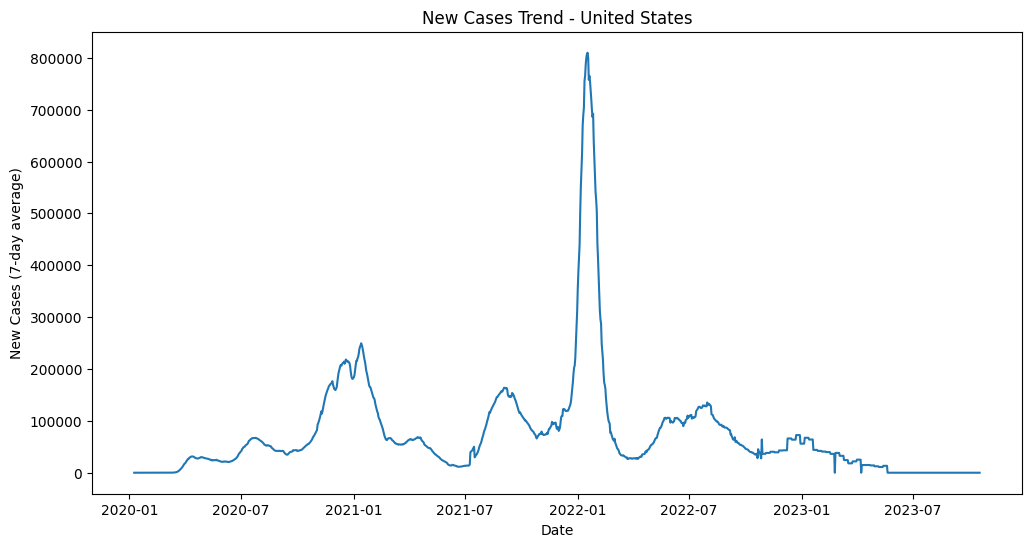

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("covid-dataset.csv")
df['date'] = pd.to_datetime(df['date'])

country_data = df[df['location'] == 'United States']
country_data = country_data.groupby('date')['new_cases'].sum().rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(country_data.index, country_data.values)
plt.title('New Cases Trend - United States')
plt.xlabel('Date')
plt.ylabel('New Cases (7-day average)')
plt.show()

**Question 90:** Study the impact of boosters on reducing case surges in highly vaccinated countries.

In [99]:
highly_vaccinated_countries = df[df['people_fully_vaccinated'] > df['people_fully_vaccinated'].quantile(0.75)]
correlation = highly_vaccinated_countries['total_boosters'].corr(highly_vaccinated_countries['new_cases'])
print("Correlation in Highly Vaccinated Countries:", correlation)

Correlation in Highly Vaccinated Countries: 0.2246860771866447


**Question 91:** Examine the duration of new waves in countries with high vaccination rates.

In [100]:
df['date'] = pd.to_datetime(df['date'])

high_vax_countries = df[df['people_fully_vaccinated'] / df['population'] > 0.7].location.unique()

def detect_wave_durations(country_data):
    wave_start = None
    wave_end = None
    wave_durations = []
    increasing = False

    for i in range(1, len(country_data)):
        if country_data['new_cases'].iloc[i] > country_data['new_cases'].iloc[i - 1]:
            if not increasing:
                wave_start = country_data.index[i - 1]
                increasing = True
        else:
            if increasing:
                wave_end = country_data.index[i]
                wave_durations.append((wave_start, wave_end, (wave_end - wave_start).days))
                increasing = False
    return wave_durations

wave_data = {}
for country in high_vax_countries:
    country_data = df[df.location == country].set_index('date').sort_index()
    wave_data[country] = detect_wave_durations(country_data)

for country, durations in wave_data.items():
    print(f"Wave Durations for {country}:")
    for start, end, duration in durations:
        print(f"  Start: {start}, End: {end}, Duration: {duration} days")

Wave Durations for Argentina:
  Start: 2020-03-04 00:00:00, End: 2020-03-06 00:00:00, Duration: 2 days
  Start: 2020-03-06 00:00:00, End: 2020-03-08 00:00:00, Duration: 2 days
  Start: 2020-03-08 00:00:00, End: 2020-03-14 00:00:00, Duration: 6 days
  Start: 2020-03-14 00:00:00, End: 2020-03-18 00:00:00, Duration: 4 days
  Start: 2020-03-19 00:00:00, End: 2020-03-21 00:00:00, Duration: 2 days
  Start: 2020-03-21 00:00:00, End: 2020-03-26 00:00:00, Duration: 5 days
  Start: 2020-03-26 00:00:00, End: 2020-03-28 00:00:00, Duration: 2 days
  Start: 2020-03-28 00:00:00, End: 2020-03-31 00:00:00, Duration: 3 days
  Start: 2020-03-31 00:00:00, End: 2020-04-03 00:00:00, Duration: 3 days
  Start: 2020-04-05 00:00:00, End: 2020-04-07 00:00:00, Duration: 2 days
  Start: 2020-04-08 00:00:00, End: 2020-04-10 00:00:00, Duration: 2 days
  Start: 2020-04-10 00:00:00, End: 2020-04-12 00:00:00, Duration: 2 days
  Start: 2020-04-12 00:00:00, End: 2020-04-14 00:00:00, Duration: 2 days
  Start: 2020-04-14 0